In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# Dataset import
file_dict = {}
for dirname, _, filenames in os.walk("./datasets/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        file_dict[filename.split(".")[0]] = str(
            os.path.join(dirname, filename))

print(file_dict)


./datasets/2024_CSIT.csv.xls
./datasets/2025_BCA.csv.xls
./datasets/2025_CSIT.csv.xls
./datasets/2026_BCA.csv.xls
./datasets/2026_CSIT.csv.xls
./datasets/disct.csv
./datasets/Final.csv
./datasets/student_demography.csv
{'2024_CSIT': './datasets/2024_CSIT.csv.xls', '2025_BCA': './datasets/2025_BCA.csv.xls', '2025_CSIT': './datasets/2025_CSIT.csv.xls', '2026_BCA': './datasets/2026_BCA.csv.xls', '2026_CSIT': './datasets/2026_CSIT.csv.xls', 'disct': './datasets/disct.csv', 'Final': './datasets/Final.csv', 'student_demography': './datasets/student_demography.csv'}


In [4]:
df_24C = pd.read_csv(file_dict["2024_CSIT"])
df_24C.head()


,Name,Roll,District Born,District Raised,Kathmandu Residence,Mode of Transportation,Commute Time,Family Size,Kathmandu Segment
0,Sairaj Budhathoki,1027,Kathmandu,Bhaktapur,Lokanthali,Car,35M,3,East KTM
1,Prabish Dangi,1021,Morang,Morang,Sifal,Foot,2M,4,West KTM
2,Anish Subedi,1005,Kathmandu,Kathmandu,Jorpati,Motorbike,10M,5,North-east KTM
3,Rishav Aryal,1024,Kathmandu,Kathmandu,New Baneshwor,Motorbike,10M,4,East KTM
4,Saurav Dhakal,1034,Kathamndu,Kathmandu,Boudhha,Foot,25M,4,North-east KTM


In [5]:
cols_to_rename = {
    "Roll": "Id",
    "District Born": "Born",
    "District Raised": "Raised",
    "Kathmandu Residence": "Residence",
    "Mode of Transportation": "Transportation",
    "Commute Time": "Commute",
    "Family Size": "Family",
    "Kathmandu Segment": "Area",
}
df_24C.rename(
    columns=cols_to_rename,
    inplace=True,
)

In [6]:
df_24C.head()


,Name,Id,Born,Raised,Residence,Transportation,Commute,Family,Area
0,Sairaj Budhathoki,1027,Kathmandu,Bhaktapur,Lokanthali,Car,35M,3,East KTM
1,Prabish Dangi,1021,Morang,Morang,Sifal,Foot,2M,4,West KTM
2,Anish Subedi,1005,Kathmandu,Kathmandu,Jorpati,Motorbike,10M,5,North-east KTM
3,Rishav Aryal,1024,Kathmandu,Kathmandu,New Baneshwor,Motorbike,10M,4,East KTM
4,Saurav Dhakal,1034,Kathamndu,Kathmandu,Boudhha,Foot,25M,4,North-east KTM


In [7]:
# Importing other datasets
df_25C = pd.read_csv(file_dict["2025_CSIT"])
df_25B = pd.read_csv(file_dict["2025_BCA"])
df_26C = pd.read_csv(file_dict["2026_CSIT"])
df_26B = pd.read_csv(file_dict["2026_BCA"])
df_25C.rename(columns=cols_to_rename, inplace=True)
df_25B.rename(columns=cols_to_rename, inplace=True)
df_26B.rename(columns=cols_to_rename, inplace=True)
df_26C.rename(columns=cols_to_rename, inplace=True)


In [8]:
# 35M -> 35
def clean_commute(x):
    return int(x.split("M")[0])


df_24C["Commute"] = df_24C["Commute"].apply(lambda x: int(x.split("M")[0]))
df_24C.head()


,Name,Id,Born,Raised,Residence,Transportation,Commute,Family,Area
0,Sairaj Budhathoki,1027,Kathmandu,Bhaktapur,Lokanthali,Car,35,3,East KTM
1,Prabish Dangi,1021,Morang,Morang,Sifal,Foot,2,4,West KTM
2,Anish Subedi,1005,Kathmandu,Kathmandu,Jorpati,Motorbike,10,5,North-east KTM
3,Rishav Aryal,1024,Kathmandu,Kathmandu,New Baneshwor,Motorbike,10,4,East KTM
4,Saurav Dhakal,1034,Kathamndu,Kathmandu,Boudhha,Foot,25,4,North-east KTM


In [9]:
# Cleaning Area Column
df_24C.Area.value_counts()


North-east KTM    11
South KTM          8
West KTM           7
East KTM           5
North-west KTM     5
North KTM          5
East from KTM      1
Name: Area, dtype: int64

In [10]:
df_24C.loc[df_24C["Area"] == "East from KTM", "Area"] = "East KTM"

In [11]:
df_24C.Area.value_counts()


North-east KTM    11
South KTM          8
West KTM           7
East KTM           6
North-west KTM     5
North KTM          5
Name: Area, dtype: int64

In [12]:
def clean_area(x):
    return x.split(" ")[0]


df_24C["Area"] = df_24C["Area"].apply(clean_area)
df_24C.head()

,Name,Id,Born,Raised,Residence,Transportation,Commute,Family,Area
0,Sairaj Budhathoki,1027,Kathmandu,Bhaktapur,Lokanthali,Car,35,3,East
1,Prabish Dangi,1021,Morang,Morang,Sifal,Foot,2,4,West
2,Anish Subedi,1005,Kathmandu,Kathmandu,Jorpati,Motorbike,10,5,North-east
3,Rishav Aryal,1024,Kathmandu,Kathmandu,New Baneshwor,Motorbike,10,4,East
4,Saurav Dhakal,1034,Kathamndu,Kathmandu,Boudhha,Foot,25,4,North-east


In [13]:
# Cleaning transportation column
df_24C.Transportation.value_counts()


Scooter            12
Foot               11
Motorbike           6
Public Bus          5
Car                 2
Bike                2
Pathao              1
Bus                 1
Cycle               1
Foot/Public Bus     1
Name: Transportation, dtype: int64

In [14]:
df_24C.loc[df_24C["Transportation"] == "Public Bus", "Transportation"] = "Public"
df_24C.loc[df_24C["Transportation"] == "Pathao", "Transportation"] = "Public"
df_24C.loc[df_24C["Transportation"] == "Bike", "Transportation"] = "Motorbike"
df_24C.loc[df_24C["Transportation"] == "Foot/Public Bus", "Transportation"] = "Foot"
df_24C.loc[df_24C["Transportation"] == "Bus", "Transportation"] = "Public"

In [15]:
df_24C.Transportation.value_counts()


Foot         12
Scooter      12
Motorbike     8
Public        7
Car           2
Cycle         1
Name: Transportation, dtype: int64

In [16]:
df_24C.sort_values(by=["Id"], inplace=True)
df_24C.head()

,Name,Id,Born,Raised,Residence,Transportation,Commute,Family,Area
40,Aayush Badu,1001,Lalitpur,Kathmandu,Bafal,Motorbike,38,5,West
41,Ananta kandel,1003,Chitwan,Chitwan,Swyambhu,Scooter,20,5,West
21,Anish Regmi,1004,Kathmandu,Kathmandu,Naya Bazaar,Cycle,13,5,North
2,Anish Subedi,1005,Kathmandu,Kathmandu,Jorpati,Motorbike,10,5,North-east
33,Archita Kandel,1007,Rupandehi,Rupandehi,Shankhamul,Public,20,5,South


In [17]:
df_24C[["Born"]].value_counts()

Born      
Kathmandu     22
Lalitpur       8
Morang         3
Jhapa          2
Chitwan        1
Chitwan        1
Kanchanpur     1
Kathamndu      1
LAlitpur       1
Pokhara        1
Rupandehi      1
dtype: int64

In [18]:
df_24C.loc[df_24C["Born"] == "LAlitpur", "Born"] = "Lalitpur"

In [19]:
df_24C.Born.value_counts()


Kathmandu     22
Lalitpur       9
Morang         3
Jhapa          2
Chitwan        1
Rupandehi      1
Pokhara        1
Kanchanpur     1
Kathamndu      1
Chitwan        1
Name: Born, dtype: int64

In [20]:
display(df_24C[df_24C["Born"] == "Chitwan"],
        df_24C[df_24C["Born"] == "Chitwan "])


,Name,Id,Born,Raised,Residence,Transportation,Commute,Family,Area
12,Sneha Poudel,1042,Chitwan,Kathmandu,Kapan,Public,20,5,North-east


,Name,Id,Born,Raised,Residence,Transportation,Commute,Family,Area
41,Ananta kandel,1003,Chitwan,Chitwan,Swyambhu,Scooter,20,5,West


In [21]:
df_24C.loc[df_24C["Born"] == "Chitwan", "Born"] = "Chitwan"

In [22]:
df_24C.iloc[41]["Residence"] = "Swayambhu"

C:\Users\user\AppData\Local\Temp\ipykernel_2104\1226882066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24C.iloc[41]["Residence"] = "Swayambhu"


In [23]:
df_24C["Residence"].value_counts()


Chabahil          5
Sanepa            2
Swyambhu          2
Sifal             2
Kapan             2
Jorpati           2
New Baneshwor     2
Kalanki           1
Minbhawan         1
Balkot            1
Yellow Pool       1
SIfal             1
Boudhha           1
Balaju            1
Asan              1
Hattiban          1
Lokanthali        1
Sukedhara         1
Bafal             1
Budhanilkantha    1
Pepsicola         1
Naxal             1
Thimi             1
Gothatar          1
Tikathali         1
Kapurdhara        1
Lazimpat          1
Satdobato         1
Maitidevi         1
Shankhamul        1
Naya Bazaar       1
Dhumbarahi        1
Name: Residence, dtype: int64

In [24]:
df_24C.loc[df_24C["Residence"] == "SIfal", "Residence"] = "Sifal"

In [25]:
df_24C["Residence"].value_counts()

Chabahil          5
Sifal             3
Sanepa            2
Kapan             2
Swyambhu          2
New Baneshwor     2
Jorpati           2
Minbhawan         1
Balkot            1
Yellow Pool       1
Lokanthali        1
Boudhha           1
Balaju            1
Kalanki           1
Hattiban          1
Asan              1
Sukedhara         1
Bafal             1
Pepsicola         1
Budhanilkantha    1
Naxal             1
Thimi             1
Gothatar          1
Tikathali         1
Kapurdhara        1
Lazimpat          1
Satdobato         1
Maitidevi         1
Shankhamul        1
Naya Bazaar       1
Dhumbarahi        1
Name: Residence, dtype: int64

In [26]:
df_24C.loc[df_24C["Raised"] == "Kathamndu", "Raised"] = "Kathmandu"
df_24C.loc[df_24C["Raised"] == "Kathamandu", "Raised"] = "Kathmandu"
df_24C.loc[df_24C["Born"] == "Chitwan ", "Born"] = "Chitwan"
df_24C.loc[df_24C["Born"] == "Kathamndu", "Born"] = "Kathmandu"

In [27]:
display(df_24C["Born"].value_counts())
df_24C.Raised.value_counts()

Kathmandu     23
Lalitpur       9
Morang         3
Chitwan        2
Jhapa          2
Rupandehi      1
Pokhara        1
Kanchanpur     1
Name: Born, dtype: int64

Kathmandu     30
Lalitpur       5
Bhaktapur      3
Chitwan        1
Rupandehi      1
Kanchanpur     1
Morang         1
Name: Raised, dtype: int64

There were no hospitals in Bhaktapur before 20 years as there are no people born in Bhaktapur


In [28]:
df_24C.Transportation.value_counts()


Scooter      12
Foot         12
Motorbike     8
Public        7
Car           2
Cycle         1
Name: Transportation, dtype: int64

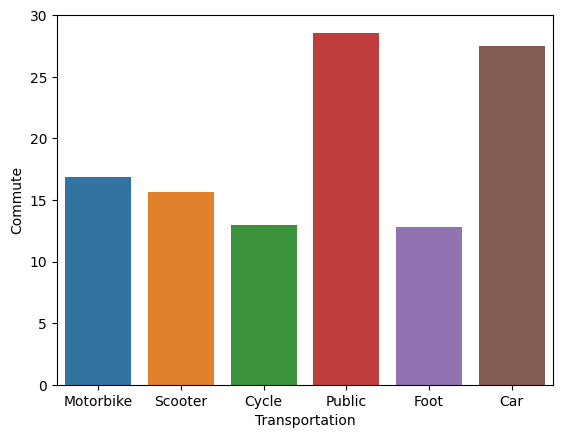

In [29]:
sns.barplot(x="Transportation", y="Commute", data=df_24C, errorbar=None)
plt.show()

In [30]:
df_24C["Batch"] = "24C"

In [31]:
df_24C.head()


,Name,Id,Born,Raised,Residence,Transportation,Commute,Family,Area,Batch
40,Aayush Badu,1001,Lalitpur,Kathmandu,Bafal,Motorbike,38,5,West,24C
41,Ananta kandel,1003,Chitwan,Chitwan,Swyambhu,Scooter,20,5,West,24C
21,Anish Regmi,1004,Kathmandu,Kathmandu,Naya Bazaar,Cycle,13,5,North,24C
2,Anish Subedi,1005,Kathmandu,Kathmandu,Jorpati,Motorbike,10,5,North-east,24C
33,Archita Kandel,1007,Rupandehi,Rupandehi,Shankhamul,Public,20,5,South,24C


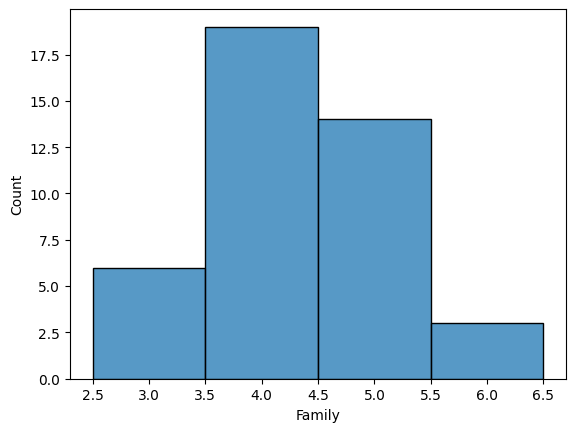

In [32]:
df_24C.Family.value_counts()
df_24C.Family = df_24C.Family.astype("category")
sns.histplot(x="Family", data=df_24C)
plt.show()

In [33]:
df_24C_without_names = df_24C.drop(columns=["Name"])


# 2025 CSIT


In [34]:
df_25C.head()


,So,Id,Born,Raised,Residence,Transportation,Commute,Family,Area
0,Avishek Parajuli,1115,Chitwan,Chitwan,Kirtipur,Public transport,90 minutes,4,South-West KTM
1,Suyash Adhikari,1143,Dhading,Kathmandu,Gurjudhara,Scooter,35 minutes,5,North KTM
2,Subhangi Lamichhane,1142,Kathmandu,Kathmandu,Chandol,Public transport,15 minutes,4,West KTM
3,Aashish Kadel,1112,Kathmandu,Kathmandu,Bagbazar,Scooter,15 minutes,5,North-west KTM
4,Aasara Bade Shrestha,1111,Kathmandu,Kathmandu,Nayabazar,Public transport,20 minutes,3,North KTM


In [35]:
df = df_25C.copy()


In [36]:
df.rename(columns={"So": "Name"}, inplace=True)
df.sort_values(by=["Id"], inplace=True)

In [37]:
df.head()


,Name,Id,Born,Raised,Residence,Transportation,Commute,Family,Area
18,Aryana Lamichhane,1102,Kathmandu,Kathmandu,Gausala,Public transport,20 minutes,5,East KTM
33,Adish Nidhi Tiwari,1107,Kathmandu,Kathmandu,Samakhusi,Motorcycle,15 minutes,5,North KTM
25,Anchit Acharya,1108,Bhaktapur,Bhaktapur,Changunaryan,Motorcycle,25 minutes,4,East KTM
7,Anshal Thapa,1109,Sunsari,Sunsari,Gothatar,Public transport,50 minutes,4,East KTM
31,Anusgya Dahal,1110,Sunsari,Sunsari,Kausaltar,Scooter,25 minutes,4,North-east KTM


In [38]:
df.Born.value_counts()


Kathmandu       18
Sunsari          4
Chitwan          3
Lalitpur         2
Bhaktapur        1
Kaski            1
Merut, India     1
Makwanpur        1
Dhading          1
Jhapa            1
Laltipur         1
Name: Born, dtype: int64

In [39]:
df.loc[df["Born"] == "Laltipur", "Born"] = "Lalitpur"
df.loc[df["Raised"] == "Kathamndu", "Raised"] = "Kathmandu"

In [40]:
df.Raised.value_counts()


Kathmandu    23
Sunsari       3
Bhaktapur     2
Chitwan       2
Kaski         1
Makwanpur     1
Jhapa         1
Lalitpur      1
Name: Raised, dtype: int64

In [41]:
df.Residence.value_counts()


Gothatar        3
Jorpati         2
Gausala         1
Balkumari       1
Khusibu         1
Patan           1
Ratopul         1
Koteshwor       1
Gurjudhara      1
Chandol         1
Suryabinayak    1
Lainchaur       1
Raniban         1
Dhumbarahi      1
Satungal        1
Purano Thimi    1
Sanobharyang    1
Pepsicola       1
Samakhusi       1
Balkhu          1
Bansbari        1
Basundhara      1
Sukedhara       1
Banasthali      1
Kirtipur        1
Bagbazar        1
Tokha           1
Nayabazar       1
Kausaltar       1
Changunaryan    1
Gaurighat       1
Name: Residence, dtype: int64

In [42]:
df.Transportation.value_counts()


Public transport    12
Motorcycle          11
Scooter              9
Cycle                1
Walk                 1
Name: Transportation, dtype: int64

In [43]:
df.Transportation = df.Transportation.apply(lambda x: x.split(" ")[0])


In [44]:
df.loc[df["Transportation"] == "Motorcycle", "Transportation"] = "Motorbike"
df.loc[df["Transportation"] == "Walk", "Transportation"] = "Foot"

In [45]:
df.Commute = df.Commute.apply(lambda x: int(x.split(" ")[0]))

In [46]:
df.Area = df.Area.apply(lambda x: str(x.split(" ")[0]))


In [47]:
df.Area.value_counts()


East          10
North         10
West           5
North-east     3
North-west     3
South          2
South-West     1
Name: Area, dtype: int64

In [48]:
df_25C_without_names = df.drop(columns=["Name"])
df_25C_without_names["Batch"] = "25C"
df_25C_without_names.head()

,Id,Born,Raised,Residence,Transportation,Commute,Family,Area,Batch
18,1102,Kathmandu,Kathmandu,Gausala,Public,20,5,East,25C
33,1107,Kathmandu,Kathmandu,Samakhusi,Motorbike,15,5,North,25C
25,1108,Bhaktapur,Bhaktapur,Changunaryan,Motorbike,25,4,East,25C
7,1109,Sunsari,Sunsari,Gothatar,Public,50,4,East,25C
31,1110,Sunsari,Sunsari,Kausaltar,Scooter,25,4,North-east,25C


# 2025 BCA


In [49]:
df = df_25B.copy()
df


,Name,Id,Born,Raised,Residence,Transportation,Commute,Family,Area
0,Stuti Paudel,427,KTM,KTM,Sifal,By foot,5min,4,North-west KTM
1,Abhigya Karmacharya,402,KTM,KTM,Chabahil,Foot,25 min,3,North-east KTM
2,Sharbani Bhattarai,416,KTM,KTM,Baneshwor,Scooter,10 min,8,East KTM
3,Sheetashma Karki,417,Lalitpur,Lalitpur,Godawari,Scooter,40 min,5,South from KTM
4,Ritika Phuyal,413,KTM,KTM,Narayantaar,Scooter,25 min,5,North KTM
5,Pariskrit Bhagat,412,Biratnagar,Biratnagar,kalo pul,By foot,5 min,4,West KTM
6,Ujjwal Basnet,426,Biratnagar,Biratnagar,Lokanthali,By bus,40min,4,East-North east KTM


In [50]:
df.Born.value_counts()
df.Residence.value_counts()
df.Raised.value_counts()
df.Transportation.value_counts()


Scooter    3
By foot    2
Foot       1
By bus     1
Name: Transportation, dtype: int64

In [51]:
df.loc[df["Born"] == "KTM", "Born"] = "Kathmandu"
df.loc[df["Raised"] == "KTM", "Raised"] = "Kathmandu"
df.loc[df["Transportation"] == "By foot", "Transportation"] = "Foot"
df.loc[df["Transportation"] == "By bus", "Transportation"] = "Public"

In [52]:
df.Commute = df.Commute.apply(lambda x: x.split(" ")[0])
df.Commute = df.Commute.apply(lambda x: x.split("m")[0])
df.Commute = df.Commute.astype("int64")


In [53]:
df.dtypes


Name              object
Id                 int64
Born              object
Raised            object
Residence         object
Transportation    object
Commute            int64
Family             int64
Area              object
dtype: object

In [54]:
df.Area = df.Area.apply(lambda x: x.split(" ")[0])


In [55]:
df.Area.value_counts()


North-west    1
North-east    1
East          1
South         1
North         1
West          1
East-North    1
Name: Area, dtype: int64

In [56]:
df.loc[df["Area"] == "East-North", "Area"] = "North-east"
df.sort_values(by=["Id"], inplace=True)

In [57]:
df_25B_without_names = df.drop(columns=["Name"])
df_25B_without_names["Batch"] = "25B"
df_25B_without_names.head()

,Id,Born,Raised,Residence,Transportation,Commute,Family,Area,Batch
1,402,Kathmandu,Kathmandu,Chabahil,Foot,25,3,North-east,25B
5,412,Biratnagar,Biratnagar,kalo pul,Foot,5,4,West,25B
4,413,Kathmandu,Kathmandu,Narayantaar,Scooter,25,5,North,25B
2,416,Kathmandu,Kathmandu,Baneshwor,Scooter,10,8,East,25B
3,417,Lalitpur,Lalitpur,Godawari,Scooter,40,5,South,25B


# 2026 CSIT


In [58]:
df = df_26C.copy()


In [59]:
df.head()


,Name,Id,Born,Raised,Residence,Transportation,Commute,Family,Area
0,Aashutosh Bikram Karki,1201,Morang,Morang,Maitidevi,Walking,30 min,4,West KTM
1,Aashutosh Pudasaini,1202,Kathmandu,Kathmandu,Guheshwori,Bike,20 min,5,South KTM
2,Adhit Upadhyay,1203,Kathmandu,Kathmandu,Siphal,Walking,5 min,5,North-east KTM
3,Akhilesh Sharma,1204,Kathmandu,Kathmandu,Maitidevi,Scooty,6 min,6,West KTM
4,Aryan Khatri,1205,Jhapa,Jhapa,Baneshwor,Scooty,15 min,5,East KTM


In [60]:
df.sort_values(by=["Id"], inplace=True)
df.head()

,Name,Id,Born,Raised,Residence,Transportation,Commute,Family,Area
0,Aashutosh Bikram Karki,1201,Morang,Morang,Maitidevi,Walking,30 min,4,West KTM
1,Aashutosh Pudasaini,1202,Kathmandu,Kathmandu,Guheshwori,Bike,20 min,5,South KTM
2,Adhit Upadhyay,1203,Kathmandu,Kathmandu,Siphal,Walking,5 min,5,North-east KTM
3,Akhilesh Sharma,1204,Kathmandu,Kathmandu,Maitidevi,Scooty,6 min,6,West KTM
4,Aryan Khatri,1205,Jhapa,Jhapa,Baneshwor,Scooty,15 min,5,East KTM


In [61]:
df.Born.value_counts()
df.Raised.value_counts()


Kathmandu             22
Lalitpur               5
Jhapa                  3
Morang                 2
Bhaktapur              2
Rupenhedi              2
Chitwan                1
Chitwan/Kathmandu      1
Kaski                  1
Biratnagar/Bhojpur     1
Dharan                 1
baden wuertemberg      1
Illam                  1
Name: Raised, dtype: int64

In [62]:
df.loc[df["Born"] == "Patan", "Born"] = "Lalitpur"
df.loc[df["Born"] == "Rupenhedi", "Born"] = "Rupandehi"
df.loc[df["Raised"] == "Rupenhedi", "Raised"] = "Rupandehi"
df.loc[df["Raised"] == "Biratnagar/Bhojpur", "Raised"] = "Bhojpur"
df.loc[df["Raised"] == "Chitwan/Kathmandu", "Raised"] = "Chitwan"

In [63]:
df.Transportation.value_counts()


Bus        16
Walking     7
Bike        6
Scooty      6
Tempo       3
Car         2
bus         2
Scooter     1
Name: Transportation, dtype: int64

In [64]:
df.loc[df.Transportation == "Walking", "Transportation"] = "Foot"
df.loc[df.Transportation == "Bike", "Transportation"] = "Motorbike"
df.loc[df.Transportation == "Tempo", "Transportation"] = "Public"
df.loc[df.Transportation == "bus", "Transportation"] = "Public"
df.loc[df.Transportation == "Bus", "Transportation"] = "Public"
df.loc[df.Transportation == "Scooty", "Transportation"] = "Scooter"
df.Commute = df.Commute.apply(lambda x: x.split(" ")[0])


In [65]:
df.Commute = df.Commute.apply(lambda x: x.split("m")[0])


In [66]:
df.Commute.value_counts()


30       7
15       6
60       6
45       5
20       4
5        3
35       3
10       2
6        1
50       1
25       1
3        1
12       1
30-40    1
40       1
Name: Commute, dtype: int64

In [67]:
df.loc[df.Commute == "30-40", "Commute"] = "35"


In [68]:
df.Commute = df.Commute.astype("int64")


In [69]:
df.Area = df.Area.apply(lambda x: x.split(" ")[0])


In [70]:
df.Area.value_counts()


East          11
North-east     9
West           7
South          7
North          5
East-North     2
North-west     1
North-East     1
Name: Area, dtype: int64

In [71]:
df.loc[df["Area"] == "East-North", "Area"] = "North-east"
df.loc[df["Area"] == "North-East", "Area"] = "North-east"

In [72]:
df_26C_without_names = df.drop(columns=["Name"])
df_26C_without_names["Batch"] = "26C"
df_26C_without_names.head()

,Id,Born,Raised,Residence,Transportation,Commute,Family,Area,Batch
0,1201,Morang,Morang,Maitidevi,Foot,30,4,West,26C
1,1202,Kathmandu,Kathmandu,Guheshwori,Motorbike,20,5,South,26C
2,1203,Kathmandu,Kathmandu,Siphal,Foot,5,5,North-east,26C
3,1204,Kathmandu,Kathmandu,Maitidevi,Scooter,6,6,West,26C
4,1205,Jhapa,Jhapa,Baneshwor,Scooter,15,5,East,26C


# 2026 BCA


In [73]:
df = df_26B.copy()
df


,No,Id,Born,Raised,Residence,Transportation,Commute,Family,Area
0,Bhargav Bikram Singh Rawal,502,Kathmandu,Kathmandu,baluwatar,bike,25 min,3,North-west KTM
1,Abhisek Pandey,501,Dang,Kathmandu,baneshwor,walk,20 min,1,East KTM
2,Phenalin Pant,503,Kathmandu,Kathmandu,kamalpokhari,parents,10 mins,5,South-west KTM
3,Samapanna Gautam,507,Birgunj,Kathmandu,gaurighat,scooter,10 mins,2,South KTM
4,Pranjal Siwakoti,505,Kathmandu,Kathmandu,bhaktapur,car,25min,4,North-east KTM
5,Prakriti Baral,504,Bhairawaha,Kathmandu,dhapasi,scotter,20min,4,North KTM
6,Ranju Jargha Magar,506,Kathmandu,Kathmandu,"tokha,meghacity",bus,1 and half hrs,6,North KTM


In [74]:
df.sort_values(by=["Id"], inplace=True)
df

,No,Id,Born,Raised,Residence,Transportation,Commute,Family,Area
1,Abhisek Pandey,501,Dang,Kathmandu,baneshwor,walk,20 min,1,East KTM
0,Bhargav Bikram Singh Rawal,502,Kathmandu,Kathmandu,baluwatar,bike,25 min,3,North-west KTM
2,Phenalin Pant,503,Kathmandu,Kathmandu,kamalpokhari,parents,10 mins,5,South-west KTM
5,Prakriti Baral,504,Bhairawaha,Kathmandu,dhapasi,scotter,20min,4,North KTM
4,Pranjal Siwakoti,505,Kathmandu,Kathmandu,bhaktapur,car,25min,4,North-east KTM
6,Ranju Jargha Magar,506,Kathmandu,Kathmandu,"tokha,meghacity",bus,1 and half hrs,6,North KTM
3,Samapanna Gautam,507,Birgunj,Kathmandu,gaurighat,scooter,10 mins,2,South KTM


In [75]:
df.rename(columns={"No": "Name"}, inplace=True)

In [76]:
df.Born.value_counts()
df.Raised.value_counts()
df.Residence.value_counts()


baneshwor          1
baluwatar          1
kamalpokhari       1
dhapasi            1
bhaktapur          1
tokha,meghacity    1
gaurighat          1
Name: Residence, dtype: int64

In [77]:
df.Born = df.Born.apply(lambda x: x.split(" ")[0])


In [78]:
df.loc[df.Born == "Bhairawaha", "Born"] = "Rupandehi"
df.loc[df.Residence == "tokha,meghacity", "Residence"] = "Tokha"
df.Residence = df.Residence.apply(lambda x: x.capitalize())

In [79]:
df.Transportation.value_counts()


walk       1
bike       1
parents    1
scotter    1
car        1
bus        1
scooter    1
Name: Transportation, dtype: int64

In [80]:
df.loc[df.Transportation == "parents", "Transportation"] = "Car"
df.loc[df.Transportation == "scotter", "Transportation"] = "Scooter"
df.loc[df.Transportation == "walk", "Transportation"] = "Foot"
df.loc[df.Transportation == "bus", "Transportation"] = "public"
df.Transportation = df.Transportation.apply(lambda x: x.capitalize())


In [81]:
df.Commute


1            20 min
0            25 min
2           10 mins
5             20min
4             25min
6    1 and half hrs
3           10 mins
Name: Commute, dtype: object

In [82]:
df.loc[df.Commute == "1 and half hrs", "Commute"] = "90"

In [83]:
df.Commute = df.Commute.apply(lambda x: x.split(" ")[0])
df.Commute = df.Commute.apply(lambda x: x.split("m")[0])
df.Commute = df.Commute.astype("int64")

In [84]:
df.Area = df.Area.apply(lambda x: x.split(" ")[0])


In [85]:
df.Area.value_counts()


North         2
East          1
North-west    1
South-west    1
North-east    1
South         1
Name: Area, dtype: int64

In [86]:
df_26B_without_names = df.drop(columns=["Name"])
df_26B_without_names["Batch"] = "26B"
df_26B_without_names.head()

,Id,Born,Raised,Residence,Transportation,Commute,Family,Area,Batch
1,501,Dang,Kathmandu,Baneshwor,Foot,20,1,East,26B
0,502,Kathmandu,Kathmandu,Baluwatar,Bike,25,3,North-west,26B
2,503,Kathmandu,Kathmandu,Kamalpokhari,Car,10,5,South-west,26B
5,504,Rupandehi,Kathmandu,Dhapasi,Scooter,20,4,North,26B
4,505,Kathmandu,Kathmandu,Bhaktapur,Car,25,4,North-east,26B


In [87]:
ultimate_df = pd.concat(
    [
        df_24C_without_names,
        df_25C_without_names,
        df_25B_without_names,
        df_26B_without_names,
        df_26C_without_names,
    ]
)

In [88]:
ultimate_df.sort_values(by="Id", inplace=True)
ultimate_df

,Id,Born,Raised,Residence,Transportation,Commute,Family,Area,Batch
1,402,Kathmandu,Kathmandu,Chabahil,Foot,25,3,North-east,25B
5,412,Biratnagar,Biratnagar,kalo pul,Foot,5,4,West,25B
4,413,Kathmandu,Kathmandu,Narayantaar,Scooter,25,5,North,25B
2,416,Kathmandu,Kathmandu,Baneshwor,Scooter,10,8,East,25B
3,417,Lalitpur,Lalitpur,Godawari,Scooter,40,5,South,25B
...,...,...,...,...,...,...,...,...,...
39,1240,Kaski,baden wuertemberg,kapan,Public,35,5,North-east,26C
40,1241,Lalitpur,Lalitpur,Jawlakhel,Scooter,40,5,South,26C
41,1242,Illam,Illam,Thimi,Public,60,4,East,26C
42,1243,Lalitpur,Lalitpur,Nakhipot,Public,35,6,South,26C


In [89]:
df = ultimate_df.copy()

In [90]:
df.Born.value_counts().sort_index()

Bhaktapur          2
Biratnagar         2
Birgunj            1
Chitwan            7
Dang               1
Dhading            1
Illam              1
Jhapa              6
Kanchanpur         1
Kaski              3
Kathmandu         65
Kavre              1
Lalitpur          19
Mahottari          1
Makwanpur          1
Merut, India       1
Morang             5
Pokhara            1
Rupandehi          4
Sindhuli           2
Sindhupalchowk     1
Sunsari            7
Name: Born, dtype: int64

In [91]:
df.Raised.value_counts().sort_index()

Bhaktapur             7
Bhojpur               1
Biratnagar            2
Chitwan               5
Dharan                1
Illam                 1
Jhapa                 4
Kanchanpur            1
Kaski                 2
Kathmandu            86
Lalitpur             12
Makwanpur             1
Morang                3
Rupandehi             3
Sunsari               3
baden wuertemberg     1
Name: Raised, dtype: int64

In [92]:
df.Transportation.value_counts().sort_index()

Bike          1
Car           6
Cycle         2
Foot         24
Motorbike    25
Public       42
Scooter      33
Name: Transportation, dtype: int64

In [93]:
df.loc[df.Transportation=='Bike', "Transportation"] = "Motorbike"

In [94]:
df.groupby("Transportation")['Commute'].mean().round(1)

Transportation
Car          25.8
Cycle        14.0
Foot         13.0
Motorbike    18.2
Public       41.0
Scooter      21.3
Name: Commute, dtype: float64

In [95]:
df.Area.value_counts().sort_index()

East          29
North         23
North-east    29
North-west    11
South         19
South-West     1
South-west     1
West          20
Name: Area, dtype: int64

In [96]:
def split_and_join(x):
    temp = x.split("-")
    if len(temp)>1:
        temp[0] = temp[0].capitalize()
        temp[1] = temp[1].capitalize()
        return " ".join(temp)
    else:
        return temp[0].capitalize()

In [97]:
df.Area = df.Area.apply(split_and_join)

In [98]:
df.Area.value_counts().sort_index()
df.reset_index(inplace=True)
df.drop(columns=['level_0','index'], inplace=True)
df.head()

KeyError: "['level_0'] not found in axis"

In [ ]:
df.to_csv('./datasets/Final.csv')

### Further data cleaning

In [100]:
disct = pd.read_csv('./datasets/disct.csv')
disct.head()

,id,DISTRICT,province,region
0,1,Udayapur,Province 1,Hilly
1,2,Khotang,Province 1,Hilly
2,3,Okhaldhunga,Province 1,Hilly
3,4,Solukhumbu,Province 1,Himalayan
4,5,Bhojpur,Province 1,Hilly


In [101]:
df['Born'] = df['Born'].replace('Biratnagar', 'Morang')
df['Raised'] = df['Raised'].replace('Biratnagar', 'Morang')
df['Born'] = df['Born'].replace('Birgunj', 'Parsa')
df['Born'] = df['Born'].replace('Pokhara', 'Kaski')
df['Born'] = df['Born'].replace('Kavre', 'Kavrepalanchok')
df['Born'] = df['Born'].replace('Illam', 'Ilam')
df['Born'] = df['Born'].replace('Pokhara', 'Kaski')
df['Born'] = df['Born'].replace('Sindhupalchowk', 'Sindhupalchok')

In [102]:
merged_df = pd.merge(df, disct, left_on='Born', right_on='DISTRICT', how='left')
merged_df.isna().sum()

index             0
Id                0
Born              0
Raised            0
Residence         0
Transportation    0
Commute           0
Family            0
Area              0
Batch             0
id                1
DISTRICT          1
province          1
region            1
dtype: int64

In [103]:
merged_df[merged_df.isna().any(axis=1)]

,index,Id,Born,Raised,Residence,Transportation,Commute,Family,Area,Batch,id,DISTRICT,province,region
70,11,1121,"Merut, India",Kathmandu,Bansbari,Public,30,3,North,25C,NaN,NaN,NaN,NaN


In [104]:
final_df = merged_df[merged_df['Born'] != 'Merut, India']
final_df.head()

,index,Id,Born,Raised,Residence,Transportation,Commute,Family,Area,Batch,id,DISTRICT,province,region
0,1,402,Kathmandu,Kathmandu,Chabahil,Foot,25,3,North East,25B,30.0,Kathmandu,Province 3,Hilly
1,5,412,Morang,Morang,kalo pul,Foot,5,4,West,25B,21.0,Morang,Province 2,Terai
2,4,413,Kathmandu,Kathmandu,Narayantaar,Scooter,25,5,North,25B,30.0,Kathmandu,Province 3,Hilly
3,2,416,Kathmandu,Kathmandu,Baneshwor,Scooter,10,8,East,25B,30.0,Kathmandu,Province 3,Hilly
4,3,417,Lalitpur,Lalitpur,Godawari,Scooter,40,5,South,25B,31.0,Lalitpur,Province 3,Hilly


In [105]:
final_df.isna().sum()

index             0
Id                0
Born              0
Raised            0
Residence         0
Transportation    0
Commute           0
Family            0
Area              0
Batch             0
id                0
DISTRICT          0
province          0
region            0
dtype: int64

In [106]:
final_df.drop(['id', 'DISTRICT'], axis = 1, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_2104\1880189724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(['id', 'DISTRICT'], axis = 1, inplace = True)


In [107]:
final_df.head()

,index,Id,Born,Raised,Residence,Transportation,Commute,Family,Area,Batch,province,region
0,1,402,Kathmandu,Kathmandu,Chabahil,Foot,25,3,North East,25B,Province 3,Hilly
1,5,412,Morang,Morang,kalo pul,Foot,5,4,West,25B,Province 2,Terai
2,4,413,Kathmandu,Kathmandu,Narayantaar,Scooter,25,5,North,25B,Province 3,Hilly
3,2,416,Kathmandu,Kathmandu,Baneshwor,Scooter,10,8,East,25B,Province 3,Hilly
4,3,417,Lalitpur,Lalitpur,Godawari,Scooter,40,5,South,25B,Province 3,Hilly


In [ ]:
final_df.to_csv('./datasets/student_demography.csv', index = False)